После просмотра хорошего фильма, когда меня захватывал сюжет, я всегда шел гуглить и искать оригинал истории. Аналогичная ситуация сложилась при просмотре очередного аниме.

Как известно, истрочником вдоховения и творителем любого аниме-сериала является манга(японский комикс).

В манге все прекрасно, однако она уступает классическому комиксу ("супергеройскому боевику марвел") тем, что рисовка черно-белая(конечно, это дело вкуса). Колоризацией страниц изначально занимается воображение человека и только спустя n-ое количество времени выпускается аниме-адаптация(а после и версия нетфликса)

Прочитав в телеге коммент про разукрашивание комиксов я сразу же загорелся желанием раскрасить однк из манг, которую читал в детстве. А что из этого вышло, узнаете ниже.

In [ ]:
# import resources
%matplotlib inline

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
import requests
from torchvision import transforms, models

In [ ]:
def load_image(img_path, max_size=400, shape=None):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    if "http" in img_path:
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
image_path = "drive/My Drive/images/"

In [ ]:
img = load_image(image_path + 'p37.png').to(device)

In [ ]:
# helper function for un-normalizing an image 
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

In [ ]:
# display the images
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# content and style ims side-by-side
ax.imshow(im_convert(img))

In [ ]:
import os
from os.path import join
from glob import glob
import argparse
from shutil import copyfile
from tqdm import tqdm
# 3p
import numpy as np
from PIL import Image
import cv2

In [ ]:
def get_panels(img_):
    gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cropped = []
    for i, con in enumerate(contours):
        con = con.reshape(-1, 2)
        std = np.max(con, axis=0) - np.min(con, axis=0)
        if std[0] > 100 and std[1] > 100:
            min_ = np.min(con, axis=0)
            max_ = np.max(con, axis=0)
            crop_img = img_[min_[1]:max_[1], min_[0]:max_[0]]
            cropped.append(crop_img)
    return cropped

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) 

In [ ]:
anime_path = "drive/My Drive/png_data/43"

In [ ]:
out_path = "drive/My Drive/vol43/"

In [ ]:
def get_images(folder):
    "returns a list of all images in folder"
    extentions = ["png"]
    images = []
    for ext in extentions:
        paths = [os.path.basename(x) for x in glob('{}/*.{}'.format(folder, ext))]
        images.extend(paths)

    return images

In [ ]:
images = get_images(anime_path)

for image in images:
    img = cv2.imread(join(anime_path, image))
    pannels = get_panels(img)
    for i, pannel in enumerate(pannels):
        cv2.imwrite(join(out_path,"{}_{}_{}".format("43",i, image)), pannel)
        #fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        #ax.imshow(pannel)

In [ ]:
images

['04.png',
 '05.png',
 '03.png',
 '06.png',
 '08.png',
 '09.png',
 '07.png',
 '12.png',
 '13.png',
 '10.png',
 '11.png',
 '16.png',
 '14.png',
 '15.png',
 '17.png',
 '19.png',
 '20.png',
 '18.png']

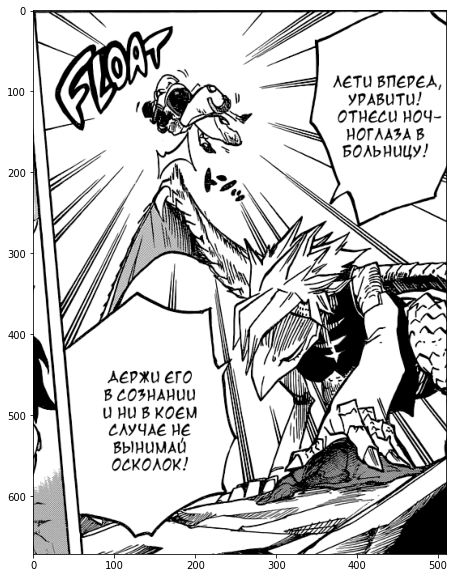

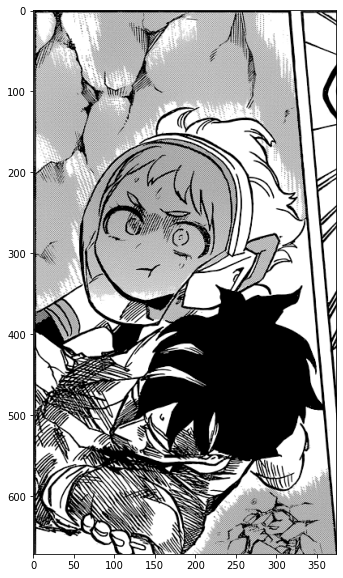

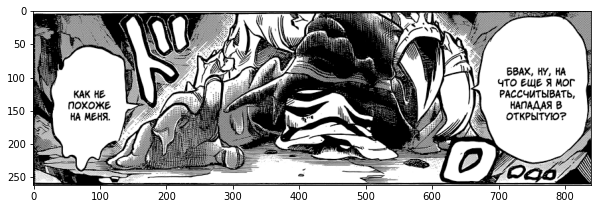

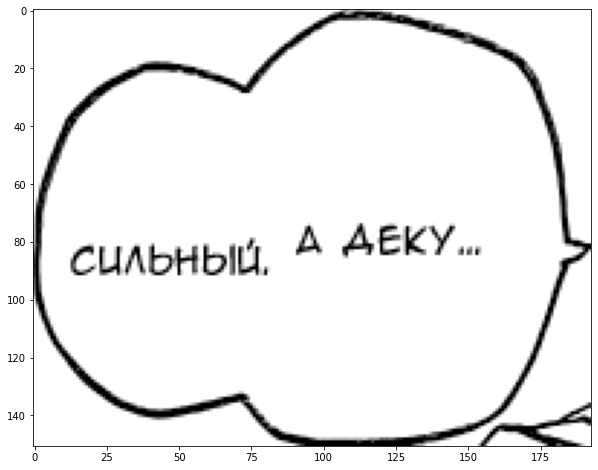

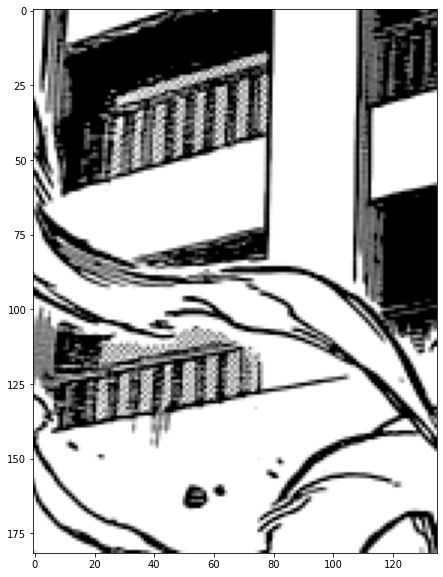

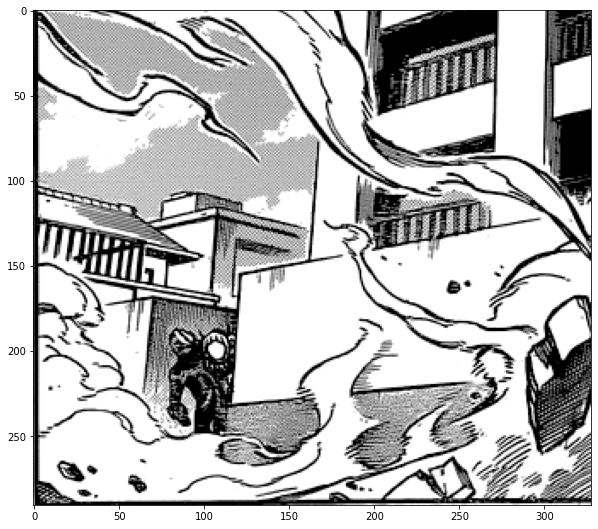

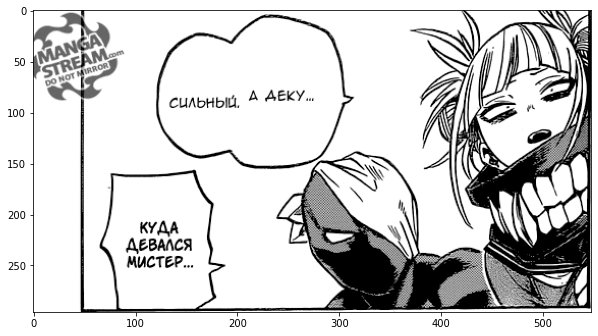

In [ ]:
pannels = get_panels(img)
for i, pannel in enumerate(pannels):
    s = str(i)
    #f = image_path+"pique"+s+".png"
    #cv2.imwrite(os.path.join(image_path,s,'.png'), pannel)
    cv2.imwrite(anime_path+s+'.png', pannel)
    #if not cv2.imwrite(r"C:\Users\Tamir\Desktop\algs"+s+".png", pannel):
    #    raise Exception("Could not write image")
    #cv2.imwrite()
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(pannel)